In [3]:
import numpy as np
#from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import imutils
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

In [7]:
EX_IM_PATH_1  = 'test_img/test_1.jpg'
EX_IM_PATH_2  = 'test_img/test_2.jpg'
EX_IM_PATH_3  = 'test_img/test_3.jpg'
EX_IM_PATH_4  = 'test_img/test_4.jpg'
EX_IM_PATH_5  = 'test_img/test_5.jpg'
EX_IM_PATH_6  = 'test_img/test_6.jpg'
EX_IM_PATH_7  = 'test_img/test_7.jpg'
EX_IM_PATH_8  = 'test_img/test_8.jpg'
EX_IM_PATH_9  = 'test_img/test_9.jpg'
EX_IM_PATH_10 = 'test_img/test_10.jpg'
EX_IM_PATH_11 = 'test_img/test_11.jpg'
EX_IM_PATH_12 = 'test_img/test_12.jpg'

In [51]:
# Load the model
model = load_model(MODEL_PATH)

In [52]:
# Define the dict of characters
character_dict = {0: '一', 1: '七', 2: '三', 3: '上', 4: '下', 5: '不', 6: '东', 7: '么', 8: '九', 9: '习', 10: '书', 11: '买', 12: '了',
                  13: '二', 14: '五', 15: '些', 16: '亮', 17: '人', 18: '什', 19: '今', 20: '他', 21: '们', 22: '会', 23: '住', 24: '作',
                  25: '你', 26: '候', 27: '做', 28: '儿', 29: '先', 30: '八', 31: '六', 32: '关', 33: '兴', 34: '再', 35: '写', 36: '冷',
                  37: '几', 38: '出', 39: '分', 40: '前', 41: '北', 42: '医', 43: '十', 44: '午', 45: '去', 46: '友', 47: '吃', 48: '同',
                  49: '名', 50: '后', 51: '吗', 52: '呢', 53: '和', 54: '哪', 55: '商', 56: '喂', 57: '喜', 58: '喝', 59: '四', 60: '回',
                  61: '国', 62: '在', 63: '坐', 64: '块', 65: '多', 66: '大', 67: '天', 68: '太', 69: '她', 70: '好', 71: '妈', 72: '姐',
                  73: '子', 74: '字', 75: '学', 76: '客', 77: '家', 78: '对', 79: '小', 80: '少', 81: '岁', 82: '工', 83: '师', 84: '年',
                  85: '店', 86: '开', 87: '影', 88: '很', 89: '怎', 90: '想', 91: '我', 92: '打', 93: '日', 94: '时', 95: '明', 96: '星',
                  97: '昨', 98: '是', 99: '月', 100: '有', 101: '朋', 102: '服', 103: '期', 104: '本', 105: '机', 106: '来', 107: '杯',
                  108: '果', 109: '校', 110: '样', 111: '桌', 112: '椅', 113: '欢', 114: '气', 115: '水', 116: '汉', 117: '没', 118: '漂',
                  119: '火', 120: '点', 121: '热', 122: '爱', 123: '爸', 124: '狗', 125: '猫', 126: '现', 127: '生', 128: '电', 129: '的',
                  130: '看', 131: '睡', 132: '租', 133: '站', 134: '米', 135: '系', 136: '老', 137: '能', 138: '脑', 139: '苹', 140: '茶',
                  141: '菜', 142: '衣', 143: '西', 144: '见', 145: '视', 146: '觉', 147: '认', 148: '识', 149: '话', 150: '语', 151: '说',
                  152: '请', 153: '读', 154: '谁', 155: '谢', 156: '起', 157: '车', 158: '这', 159: '那', 160: '都', 161: '里', 162: '钟',
                  163: '钱', 164: '院', 165: '雨', 166: '零', 167: '面', 168: '飞', 169: '饭', 170: '馆', 171: '高'}

# Useful functions

In [53]:
def show_prepr_im(im, gray_im, blur_im, edge_im):
    titles = ['Original', 'Grayscaled', 'Blurred', 'Edge-detected']

    images = [im, gray_im, blur_im, edge_im]

    fig, axes = plt.subplots(2, 2, figsize=(8, 5))

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(titles[i])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Preprocess image

In [8]:
# Load image
image = cv2.imread(EX_IM_PATH_4)

In [11]:
image.shape
# hight, width, color

(422, 518, 3)

In [95]:
def preprocess_img(img, visualize : bool):
    # Grayscale conversion
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

    # Adaptive threshold (to improve detection accuracy)
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, 
                                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                            cv2.THRESH_BINARY_INV, 
                                            15, 10)

    # Blurring to smooth the image before edge detection
    blurred = cv2.GaussianBlur(adaptive_thresh, (3, 3), 0)

    # Edge detection with Canny
    edged = cv2.Canny(blurred, 50, 150)

    # Morphological operations to clean up noise and close gaps
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    morph  = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

    # Show preprocessed images
    if visualize == True:
        show_prepr_im(img, gray, blurred, morph)

    return morph

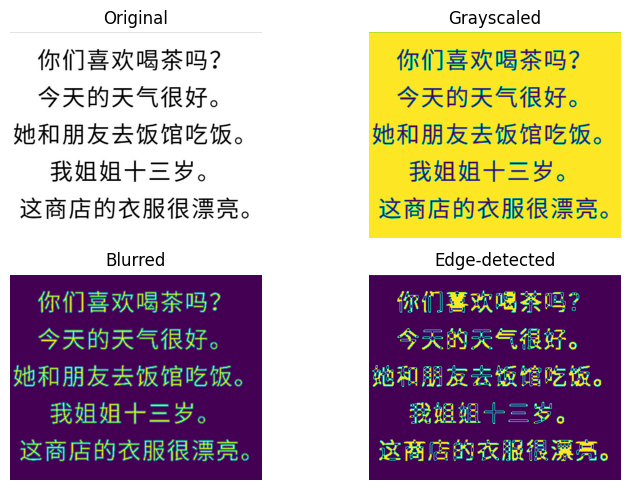

In [96]:
morph = preprocess_img(image, True)

# Detect contours

In [97]:
def detect_contours(original_img, morph_img):
    # Detect contours
    cnts = cv2.findContours(morph_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # Sorting contours from left to right
    cnts = sort_contours(cnts, method = "left-to-right")[0]

    filtered_contours = []

    for c in cnts:
        x, y, w, h = cv2.boundingRect(c) # Getting a rectangle around a contour
        aspect_ratio = w / float(h)
        area = w * h

        # Условие фильтрации: размер, соотношение сторон и площадь
        if 5 <= w <= 150 and 20 <= h <= 120 and 0.2 <= aspect_ratio <= 5 and area >= 100:
            filtered_contours.append((x, y, w, h))

    # Drawing rectangles around each found character
    for (x, y, w, h) in filtered_contours:
        detected_img = cv2.rectangle(original_img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangles

    return detected_img, filtered_contours

In [98]:
detected_img, _ = detect_contours(image, morph)

cv2.imshow("Detected Characters", detected_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Recognize characters

In [ ]:
# Recognize and annotate characters using SimSun font
def recognize_characters(original_img, morph_img, model, character_dict):
    # Detect contours
    detected_img, filtered_contours = detect_contours(original_img, morph_img)

    # Convert the original image to a PIL Image for rendering text
    pil_img = Image.fromarray(cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB))
    draw    = ImageDraw.Draw(pil_img)

    # Load SimSun font
    font = ImageFont.truetype("simsun.ttc", 30)  # Adjust font size as needed

    # Loop through each filtered contour
    for (x, y, w, h) in filtered_contours:
        # Extract ROI (Region of Interest)
        roi = detected_img[y:y + h, x:x + w]

        # Preprocess ROI for the model
        roi_gray       = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        roi_resized    = cv2.resize(roi_gray, (64, 64))  # Resize to (64, 64)
        roi_normalized = roi_resized / 255.0  # Normalize pixel values to [0, 1]
        roi_input      = roi_normalized.reshape(1, 64, 64, 1)  # Add batch and channel dimensions

        # Predict using the model
        prediction      = model.predict(roi_input)
        predicted_index = np.argmax(prediction)  # Get the index of the highest probability
        predicted_char  = character_dict.get(predicted_index, "?")  # Get character from dictionary

        # Render the predicted character using PIL and SimSun font
        draw.text((x, y - 35), predicted_char, font = font, fill = (255, 0, 0, 255))

    # Convert back to OpenCV format
    annotated_img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
    return annotated_img



In [ ]:
# Process and recognize characters with your model and dictionary
detected_img = recognize_characters(image, morph, model, character_dict)

# Show final result
cv2.imshow("Detected and Recognized Characters", detected_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

In [2]:
lines = [
    [(23, 47, 32, 34), (91, 48, 33, 33), (161, 48, 28, 32), (229, 48, 34, 32), (56, 49, 33, 31), (126, 49, 33, 31), (195, 49, 33, 31)],
    [(23, 105, 32, 33), (91, 105, 33, 33), (161, 105, 28, 33), (229, 105, 34, 33), (368, 105, 33, 32), (402, 105, 33, 33), (56, 106, 33, 32), (126, 106, 33, 31), (439, 107, 30, 31), (197, 109, 29, 4), (264, 106, 34, 32), (298, 106, 34, 32)],
    [(195, 130, 33, 5)],
    [(23, 163, 30, 33), (92, 163, 32, 32), (56, 164, 33, 32)],
    [(402, 219, 33, 33), (437, 219, 33, 32), (23, 220, 30, 32), (91, 220, 33, 33), (161, 220, 28, 32), (298, 220, 34, 32), (368, 220, 33, 32), (126, 220, 32, 32), (56, 221, 33, 31), (197, 223, 28, 4), (229, 219, 34, 33), (263, 219, 34, 33)],
    [(195, 245, 33, 4)]
]

wrong_contours = [(197, 109, 29, 4), (195, 245, 33, 4), (195, 130, 33, 5), (197, 223, 28, 4)]

# Organize wrong_contours into corresponding lines
wrong_contours_lines = [[] for _ in range(len(lines))]

for box in wrong_contours:
    for i, line in enumerate(lines):
        if box in line:
            wrong_contours_lines[i].append(box)

# Output the organized wrong_contours_lines
print(wrong_contours_lines)

[[], [(197, 109, 29, 4)], [(195, 130, 33, 5)], [], [(197, 223, 28, 4)], [(195, 245, 33, 4)]]
